In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
with open("/content/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [4]:
with open("/content/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [6]:
path = "/content/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

In [8]:
df.to_csv('fi.csv')

In [9]:
df['target'].value_counts()

,count
target,
smurf.,280790
neptune.,107201
normal.,97278
back.,2203
satan.,1589
ipsweep.,1247
portsweep.,1040
warezclient.,1020
teardrop.,979


In [10]:
df['Attack Type'].value_counts()

,count
Attack Type,
dos,391458
normal,97278
probe,4107
r2l,1126
u2r,52


In [11]:
df.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [12]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [13]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

In [14]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

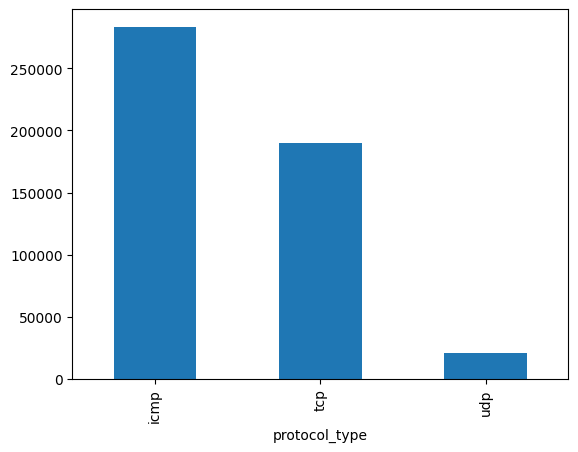

In [15]:
bar_graph('protocol_type')

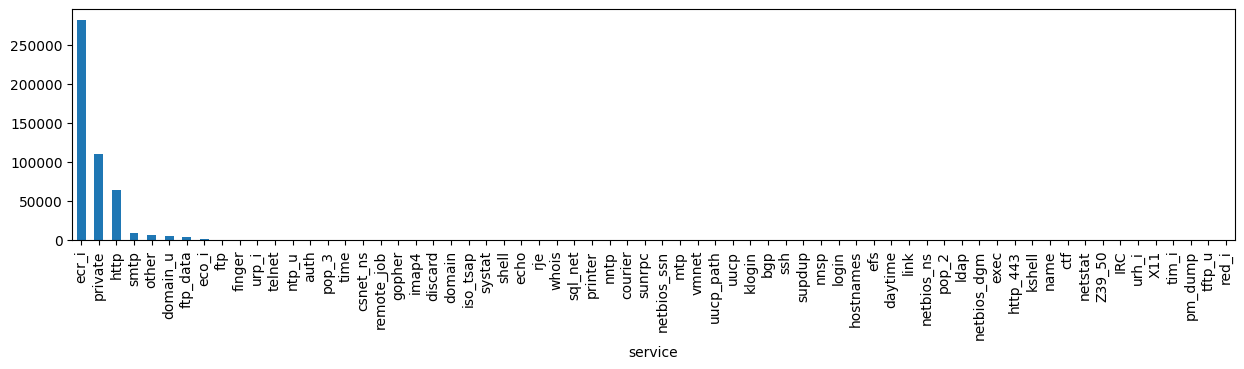

In [17]:
plt.figure(figsize=(15,3))
bar_graph('service')

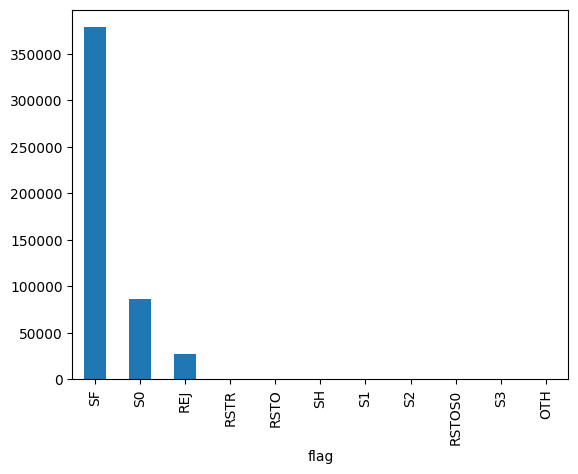

In [16]:
bar_graph('flag')

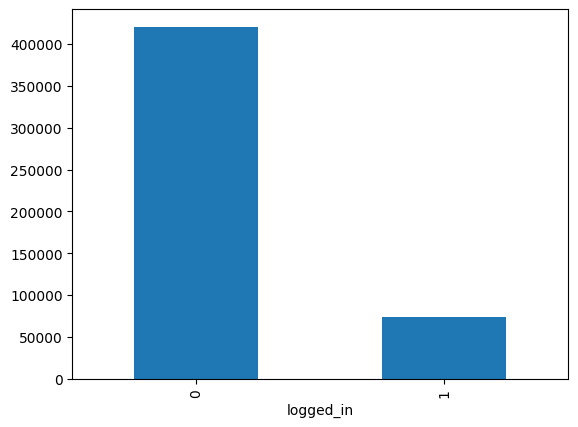

In [18]:
bar_graph('logged_in')

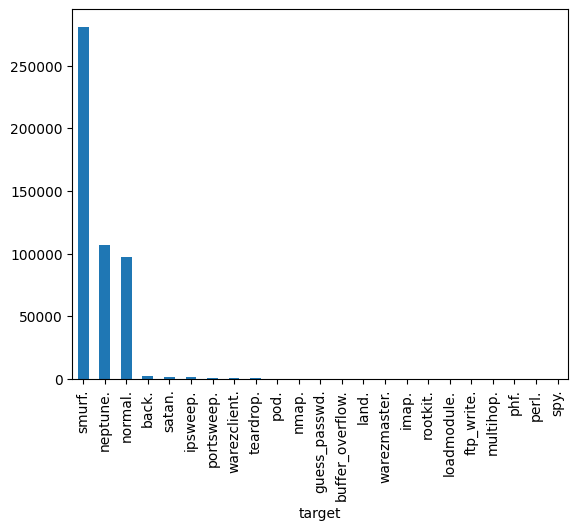

In [19]:
bar_graph('target')

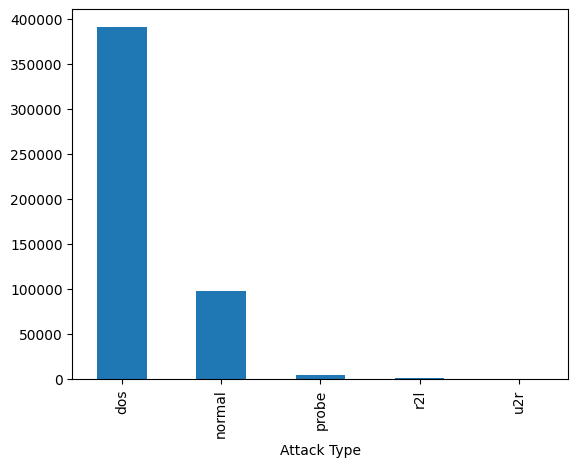

In [20]:
bar_graph('Attack Type')

In [21]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [22]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [23]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [24]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [25]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [26]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [27]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [28]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110285

In [29]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342690969

In [30]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630323716

In [31]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.944926367678324

In [32]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104371

In [33]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739603

In [34]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.997849248567986

In [35]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.999304109185027

In [36]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.986994792495618

In [37]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308264

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751695

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845764

In [40]:
df.drop('hot',axis = 1,inplace = True)
df.drop('num_failed_logins',axis = 1,inplace = True)
df.drop('logged_in',axis = 1,inplace = True)
df.drop('num_compromised',axis = 1,inplace = True)
df.drop('root_shell',axis = 1,inplace = True)
df.drop('su_attempted',axis = 1,inplace = True)
df.drop('num_root',axis = 1,inplace = True)
df.drop('num_file_creations',axis = 1,inplace = True)
df.drop('num_shells',axis = 1,inplace = True)
df.drop('num_access_files',axis = 1,inplace = True)
df.drop('is_host_login',axis = 1,inplace = True)
df.drop('is_guest_login',axis = 1,inplace = True)
df.drop('dst_host_count',axis = 1,inplace = True)
df.drop('dst_host_srv_count',axis = 1,inplace = True)
df.drop('dst_host_same_srv_rate',axis = 1,inplace = True)
df.drop('dst_host_diff_srv_rate',axis = 1,inplace = True)
df.drop('dst_host_same_src_port_rate',axis = 1,inplace = True)
df.drop('dst_host_srv_diff_host_rate',axis = 1,inplace = True)
df.drop('dst_host_serror_rate',axis = 1,inplace = True)
df.drop('dst_host_srv_serror_rate',axis = 1,inplace = True)
df.drop('dst_host_rerror_rate',axis = 1,inplace = True)
df.drop('dst_host_srv_rerror_rate',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1, inplace=True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

DELETE

In [41]:
df.shape

(494021, 19)

In [42]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'num_outbound_cmds',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'target', 'Attack Type'],
      dtype='object')

In [43]:
df['protocol_type'].value_counts()

,count
protocol_type,
icmp,283602
tcp,190065
udp,20354


In [44]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [45]:
df['flag'].value_counts()

,count
flag,
SF,378440
S0,87007
REJ,26875
RSTR,903
RSTO,579
SH,107
S1,57
S2,24
RSTOS0,11


In [46]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [47]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_outbound_cmds,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,normal.,normal


In [48]:
df.drop('service',axis = 1,inplace= True)

In [49]:
df.shape

(494021, 18)

In [50]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_outbound_cmds,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,8,8,0.0,0.0,1.0,0.0,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,6,6,0.0,0.0,1.0,0.0,0.0,normal.,normal


In [51]:
df.dtypes

,0
duration,int64
protocol_type,int64
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
num_outbound_cmds,int64
count,int64


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [53]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 17)
(330994, 16) (163027, 16)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [61]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [62]:
modelGussian = GaussianNB()

In [63]:
start_time = time.time()
modelGussian.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [64]:
print("Training time: ",end_time-start_time)

Training time:  0.7825124263763428


In [66]:
start_time = time.time()
Y_test_pred1 = modelGussian.predict(X_test)
end_time = time.time()

In [67]:
print("Testing time: ",end_time-start_time)

Testing time:  0.11803364753723145


In [69]:
print("Train score is:", modelGussian.score(X_train, Y_train))
print("Test score is:",modelGussian.score(X_test,Y_test))

Train score is: 0.8534233248941069
Test score is: 0.8531592926325087


DECISION TREE

In [70]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [71]:
modelTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [72]:
start_time = time.time()
modelTree.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [73]:
print("Training time: ",end_time-start_time)

Training time:  2.809640645980835


In [76]:
start_time = time.time()
Y_test_pred2 = modelTree.predict(X_test)
end_time = time.time()

In [77]:
print("Testing time: ",end_time-start_time)

Testing time:  0.016611576080322266


In [79]:
print("Train score is:", modelTree.score(X_train, Y_train))
print("Test score is:",modelTree.score(X_test,Y_test))

Train score is: 0.992169042339136
Test score is: 0.991780502616131


GRADIENT BOOSTING CLASSIFIER

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
modelGR = GradientBoostingClassifier(random_state=0)

In [82]:
start_time = time.time()
modelGR.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [83]:
print("Training time: ",end_time-start_time)

Training time:  262.36384987831116


In [85]:
print("Train score is:", modelGR.score(X_train, Y_train))
print("Test score is:", modelGR.score(X_test,Y_test))

Train score is: 0.9973171719124818
Test score is: 0.9969023535978703


**RANDOM** **FOREST**

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(n_estimators=18)

In [56]:
start_time = time.time()
model.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [57]:
print("Training time: ",end_time-start_time)

Training time:  4.588963270187378


In [58]:
start_time = time.time()
Y_test_pred3 = model.predict(X_test)
end_time = time.time()

In [59]:
print("Testing time: ",end_time-start_time)

Testing time:  0.16656780242919922


In [60]:
print("Train score is:", model.score(X_train, Y_train))
print("Test score is:",model.score(X_test,Y_test))

Train score is: 0.9978156703746895
Test score is: 0.9973869359063222


In [86]:
print(Y_test_pred3)

['dos' 'dos' 'dos' ... 'normal' 'dos' 'dos']


In [87]:
X_test.shape

(163027, 16)

In [88]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('pmap.pkl', 'wb') as file:
    pickle.dump(pmap, file)
with open('fmap.pkl', 'wb') as file:
    pickle.dump(fmap, file)